# Survival analysis

## EDA

In [1]:
data whas500;
  set 'whas500.sas7bdat';
run;

SAS Connection established. Subprocess id is 2974




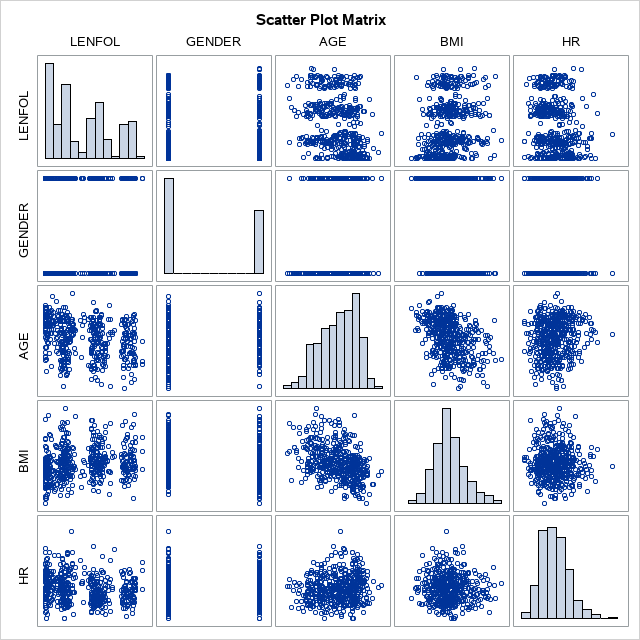

In [2]:
proc corr data = whas500 plots(maxpoints=none)=matrix(histogram);
var lenfol gender age bmi hr;
run;

## Survival function

### Estimation using non-parametric estimators (Kaplan-Meier)


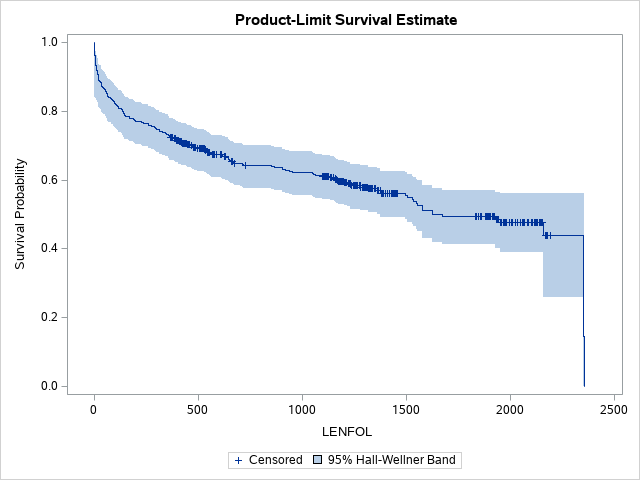

In [3]:
proc lifetest data=whas500 atrisk plots=survival(cb) outs=outwhas500;
time lenfol*fstat(0);
run;


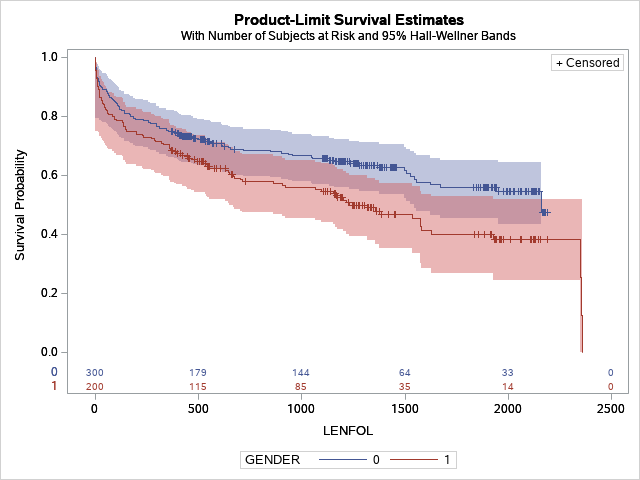

In [11]:
ods exclude ProductLimitEstimates; 
proc lifetest data=whas500 atrisk plots=survival(atrisk cb) outs=outwhas500;
strata gender;
time lenfol*fstat(0);
run;

### Cox-proportional model

In [5]:
proc phreg data = whas500;
class gender;
model lenfol*fstat(0) = gender age;
run;

#### Predicting expected survival function


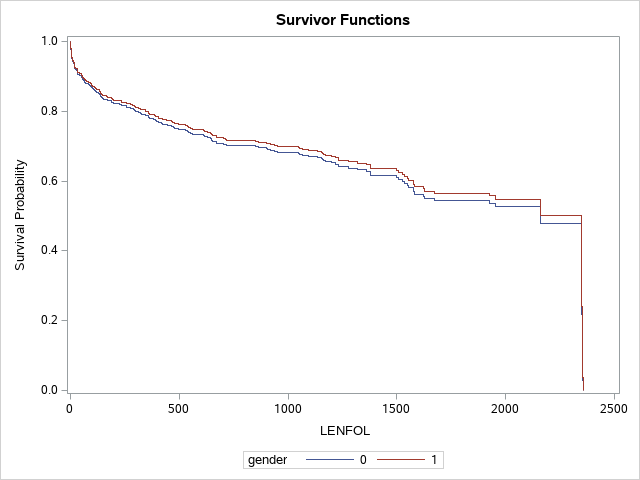

In [14]:
data covs;
input gender age;
datalines;
0 69.845947
1 69.845947
;
run;

proc phreg data = whas500 plots(overlay)=(survival);
class gender;
model lenfol*fstat(0) = gender age;
baseline covariates=covs out=base / rowid=gender;
run;

/*data base;
set base;
run;

proc print data=base  (obs=5);
run;*/

#### Model check


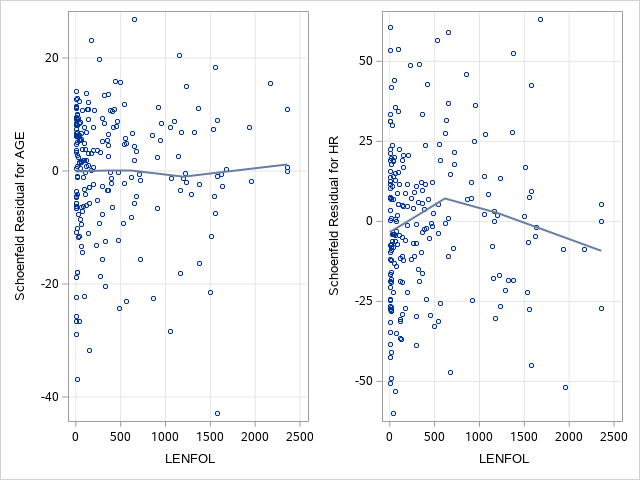

In [16]:
proc phreg data=whas500;
class gender;
model lenfol*fstat(0) = gender|age bmi|bmi hr;
output out=schoen ressch=schgender schage schgenderage
   schbmi schbmibmi schhr;
run;

data schoen;
set schoen;
run;

proc sgscatter data=schoen;
plot (schage schhr)*lenfol/loess grid;
run;


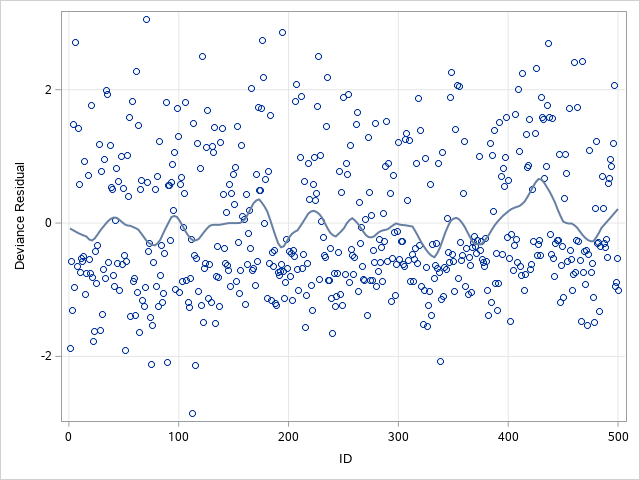

In [19]:
proc phreg data=whas500 NOPRINT;
class gender;
model lenfol*fstat(0) = gender|age bmi|bmi hr;
output out=resid resdev=residuals;
run;



proc sgscatter data=resid;
plot residuals*ID/loess grid;
run;